In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [9]:

# Load the FIFA Twitter comments dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv(r"C:\Users\Aditya\Downloads\fifa_world_cup_2022_tweets.csv")


In [10]:
data.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [24]:
# Preprocessing and Text Cleaning
def clean_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text()  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stop words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return ' '.join(words)

In [25]:
data['Tweet'] = data['Tweet'].apply(clean_text)

In [26]:
# Split the dataset into features (X) and labels (y)
X = data['Tweet']
y = data['Sentiment']  # Replace 'sentiment' with the actual column name containing labels

In [97]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [98]:

# Feature Extraction (TF-IDF)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the number of features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [99]:
# Model Building (Naive Bayes as an example)
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)
y_pred = naive_bayes.predict(X_test_tfidf)

In [100]:

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.713873473917869


In [101]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")


              precision    recall  f1-score   support

    negative       0.74      0.71      0.73      1182
     neutral       0.65      0.69      0.67      1586
    positive       0.76      0.74      0.75      1737

    accuracy                           0.71      4505
   macro avg       0.72      0.71      0.71      4505
weighted avg       0.72      0.71      0.71      4505

Confusion Matrix:


In [102]:
print(confusion_matrix(y_test, y_pred))

[[ 837  239  106]
 [ 197 1088  301]
 [  92  354 1291]]


<Axes: >

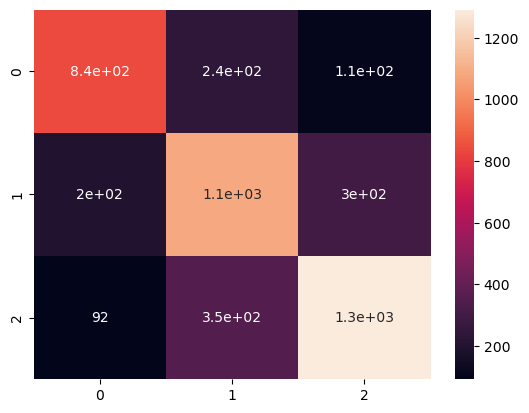

In [103]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=4)

In [105]:
rf.fit(X_train_tfidf, y_train)
y_pred = rf.predict(X_test_tfidf)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6812430632630411


In [107]:
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")


              precision    recall  f1-score   support

    negative       0.69      0.64      0.67      1182
     neutral       0.61      0.70      0.65      1586
    positive       0.76      0.69      0.72      1737

    accuracy                           0.68      4505
   macro avg       0.69      0.68      0.68      4505
weighted avg       0.69      0.68      0.68      4505

Confusion Matrix:


<Axes: >

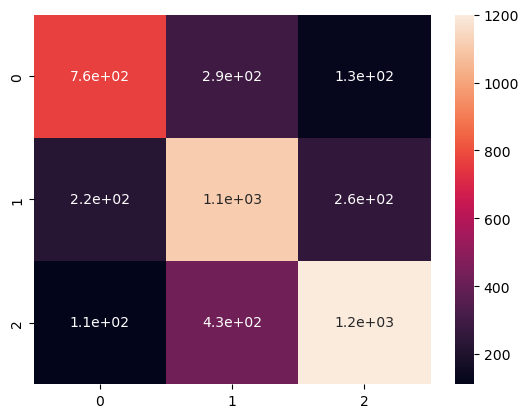

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)